<a href="https://colab.research.google.com/github/AtharvaTambat/GNR638/blob/main/Copy_of_Copy_of_GNR_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary libraries**

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(10) # Setting the seed so that we get deterministic values on running each time

# **Generating data-points from the Bivariate Gaussian**

In [75]:
X = np.vstack([np.random.normal(1, 0.5, 2000).reshape(1000,2),np.random.normal(2, 0.2, 2000).reshape(1000,2)]) # Generates a set of 2000 values (x,y) from biavariate gaussian
Y = np.hstack([[0]*1000,[1]*1000]) # Labels for the data 

# Creating a dataframe
dataset = pd.DataFrame(X, columns={"Y","X"})
dataset["Label"] = Y

# **Visualizing the data**

In [76]:
dataset # Visualizing the data in tabular form

,X,Y,Label
0,1.665793,1.357639,0
1,0.227300,0.995808,0
2,1.310668,0.639957,0
3,1.132756,1.054274,0
4,1.002146,0.912700,0
...,...,...,...
1995,2.222150,2.230054,1
1996,2.134849,2.097750,1
1997,2.088755,1.700387,1
1998,2.179847,2.257507,1


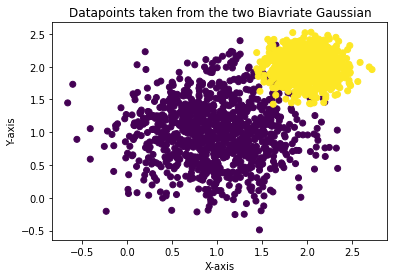

In [77]:
# Visualizing the dataset on a graph
plt.scatter(dataset['X'],dataset['Y'], c=dataset['Label'])

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title('Datapoints taken from the two Biavriate Gaussian')

plt.show()

# **Converting the labels for individual data-points into one-hot vectors**

In [78]:
Z = np.zeros((2000,2))
for i in range(2000):
  Z[i, Y[i]] = 1

print (Z)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [79]:
X.shape

(2000, 2)

# **Initialising Random weights and biases**

In [80]:
Wi_1 = np.random.randn(2,2)
Bi_1 = np.random.randn(2)
Wi_2 = np.random.randn(2,2)
Bi_2 = np.random.randn(2)


In [81]:
Wi_1

array([[-2.08918652,  0.0856184 ],
       [ 0.63745566,  1.97878691]])

In [82]:
Bi_1

array([ 0.83322508, -0.24834427])

In [83]:
Wi_2

array([[-1.37223387,  0.44611391],
       [ 1.02836908, -2.41412661]])

In [84]:
Bi_2

array([ 0.26480478, -0.50286511])

# **Forward Propogation Functions**

In [85]:
def tanh(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def softmax(x):
  return np.exp(x)/(np.exp(x).sum(axis=1, keepdims=True))

In [86]:
def forward_prop(X, Wi_1, Wi_2, Bi_1, Bi_2):
  # first layer
  M = tanh(X.dot(Wi_1.T)+Bi_1)

  # second layer
  Y = softmax(M.dot(Wi_2)+ Bi_2)

  return Y, M

# **Backpropogation steps and implimenting gradient descent** 

In [87]:
# Returns gradient for weight_2 - cross entropy loss + MSE loss
def dr_Wi_2(H, Z, Y):
  # Derivative of the cross entropy loss 
  dr_cross = (Z-Y)
  # Derivative of the MSE loss
  temp = np.array([[1,-1],[-1, 1]])
  dr_MSE = Y[:,[0]]*Y[:,[1]]*((Z-Y).dot(temp))/2000

  # returning the sum of derivative wrt both losses
  return (H.T.dot(dr_cross+dr_MSE))

In [88]:
# Returns gradient for weight 1 - cross entropy loss + MSE loss
def dr_Wi_1(X, H, Z, output, Wi_2):
  # Derivative of the cross entropy loss 
  dr_cross = (Z-output)
  # Derivative of the MSE loss
  temp = np.array([[1,-1],[-1, 1]])
  dr_MSE = output[:,[0]]*output[:,[1]]*((Z-output).dot(temp))/2000

  dZ = (dr_cross + dr_MSE).dot(Wi_2.T)*(1-H*H) # NOTE: (1-H^2) is the derivative of the tanh activation function

  # returning the sum of derivative wrt both losses
  return X.T.dot(dZ)

In [89]:
# Returns the derivative of both biases
def dr_B2(Z,Y):
  # Derivative of the MSE loss
  temp = np.array([[1,-1],[-1, 1]])
  dr_MSE = Y[:,[0]]*Y[:,[1]]*((Z-Y).dot(temp))/2000

  # Derivative of the cross entropy loss 
  dr_cross = (Z-Y)

  # returning the sum of derivative wrt both losses
  return ( dr_cross + dr_MSE).sum(axis=0)

def dr_B1(Z, Y, Wi_2, H):
  # Derivative of the MSE loss
  temp = np.array([[1,-1],[-1, 1]])
  dr_MSE = Y[:,[0]]*Y[:,[1]]*((Z-Y).dot(temp))/2000

  # Derivative of the cross entropy loss 
  dr_cross = (Z-Y)

  # returning the sum of derivative wrt both losses
  return (((Z-Y)+dr_MSE).dot(Wi_2.T)*(1-H*H)).sum(axis=0) # NOTE: (1-H^2) is the derivative of the tanh activation function


In [90]:
learning_rate = 0.0001 # Defining the learning rate of the NN

# Creating arrays for storing intermediate values
loss=[]
weight1 = []
weight2 = []
weight3 = []
weight4 = []

weight5 = []
weight6 = []
weight7 = []
weight8 = []

# Training the NN over all datapoints for a large number iterations
for epoch in range(10000):
  output, hidden = forward_prop(X, Wi_1, Wi_2, Bi_1, Bi_2)
  Wi_2 += learning_rate*dr_Wi_2(hidden, Z, output)
  Bi_2 += learning_rate*dr_B2(Z, output)
  Wi_1 += learning_rate*dr_Wi_1(X, hidden, Z, output, Wi_2).T
  Bi_1 += learning_rate*dr_B1(Z, output, Wi_2, hidden)

  loss.append(np.sum(np.square(output-Z))/2000 - np.trace(Z.dot((np.log(output).T))))

  weight1.append(Wi_1[0,0])
  weight2.append(Wi_1[0,1])
  weight3.append(Wi_1[1,0])
  weight4.append(Wi_1[1,1])

  weight5.append(Wi_2[0,0])
  weight6.append(Wi_2[0,1])
  weight7.append(Wi_2[1,0])
  weight8.append(Wi_2[1,1])

  if (epoch%100==0):
    print("Loss: ", np.sum(np.square(output-Z))/2000 - np.trace(Z.dot((np.log(output).T))))

Loss:  6043.616808674095
Loss:  445.2061233044293
Loss:  191.5936437724569
Loss:  147.7832503874023
Loss:  129.8055537102194
Loss:  120.27352984204069
Loss:  114.54637654848035
Loss:  110.82947488910955
Loss:  108.28729625397531
Loss:  106.48118727500182
Loss:  105.16045729167371
Loss:  104.1724954732902
Loss:  103.4197535604666
Loss:  102.8374157135276
Loss:  102.38103919537758
Loss:  102.01934885379646
Loss:  101.72985183636264
Loss:  101.49607053500134
Loss:  101.30574204277741
Loss:  101.14961504505334
Loss:  101.02062715687279
Loss:  100.91333091379967
Loss:  100.82348604881034
Loss:  100.74776525963793
Loss:  100.68353885491452
Loss:  100.62871512557342
Loss:  100.5816206683655
Loss:  100.5409097375052
Loss:  100.50549494449203
Loss:  100.47449383234337
Loss:  100.44718737362025
Loss:  100.42298750785413
Loss:  100.4014115899392
Loss:  100.38206216339366
Loss:  100.36461086575389
Loss:  100.34878556159205
Loss:  100.33436001184431
Loss:  100.3211455472389
Loss:  100.3089843333307

# **Plotting the Loss and the value of weights on the hidden and output layers**

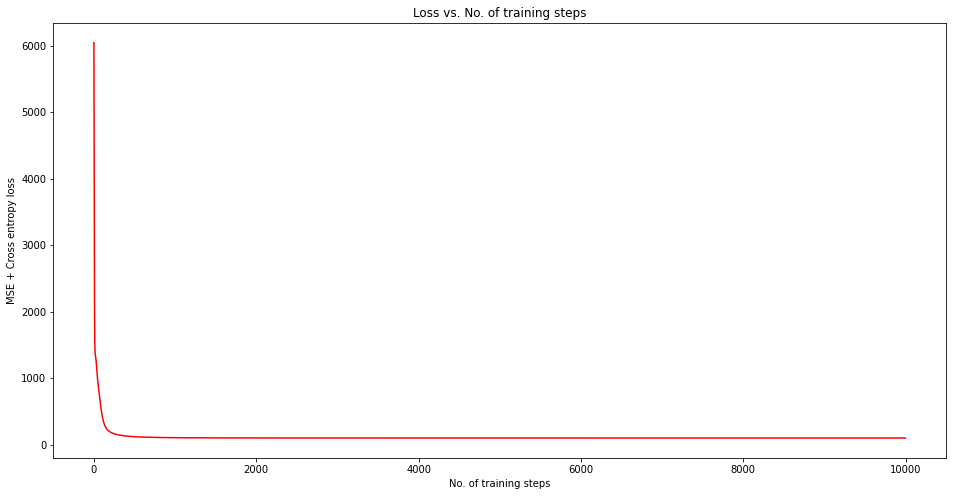

In [91]:
# Plotting the loss wrt no. of training steps
plt.figure(figsize=(16, 8))
plt.plot(range(10000), loss, color="red")

plt.xlabel("No. of training steps")
plt.ylabel("MSE + Cross entropy loss")
plt.title('Loss vs. No. of training steps')

plt.show()

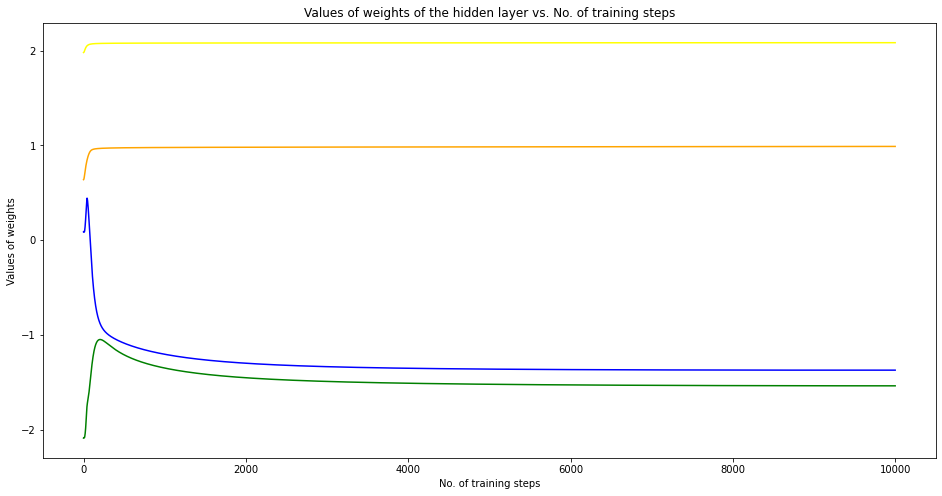

In [92]:
# Plotting the weights with the number of trainign steps
plt.figure(figsize=(16, 8))
plt.plot(range(10000), weight1, color="green")
plt.plot(range(10000), weight2, color="blue")
plt.plot(range(10000), weight3, color="orange")
plt.plot(range(10000), weight4, color="yellow")

plt.xlabel("No. of training steps")
plt.ylabel("Values of weights")
plt.title('Values of weights of the hidden layer vs. No. of training steps')

plt.show()

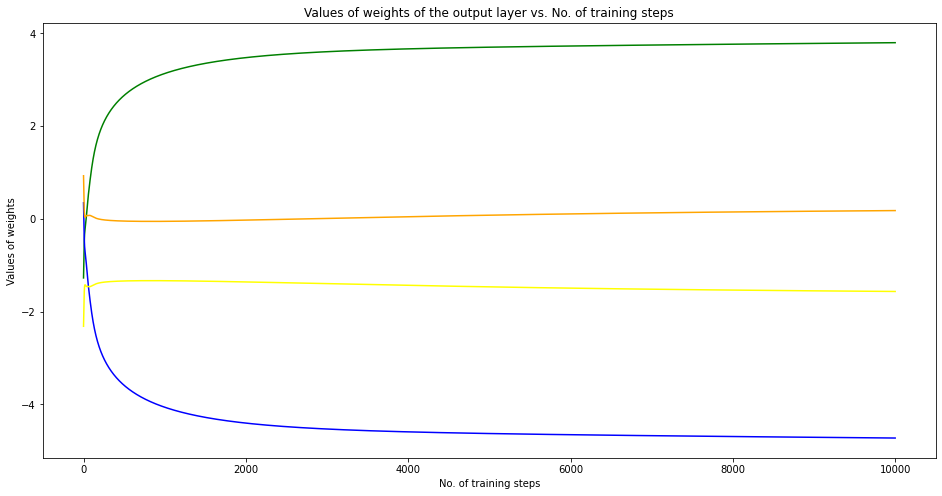

In [93]:
plt.figure(figsize=(16, 8))
plt.plot(range(10000), weight5, color="green")
plt.plot(range(10000), weight6, color="blue")
plt.plot(range(10000), weight7, color="orange")
plt.plot(range(10000), weight8, color="yellow")

plt.xlabel("No. of training steps")
plt.ylabel("Values of weights")
plt.title('Values of weights of the output layer vs. No. of training steps')

plt.show()